In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

##### 1. Suppose N patients (patient node), need N*k medical care Units (N=500,k(mean)=5 (reperests by sum of edges' weight), total 2500 units needed)
##### 2. Suppose M doctors (doctor node), supply M*j medical care Units (M=300, j=6 (reperest by node's  weight), total 1800 units supply)
##### (Supply << demand)
##### 3. random assgin doctors to patients (2500 edges)
##### 4. connect doctors who have same patient edges 
##### 5. doctors have collabtarion increses medical care supply (1.05*j for each collabrations)

In [227]:
# create network
N=100
k=5
M=60
j=6
G=nx.Graph()
# create patient nodes
# suppose each patient's needed medical follows normal distribution (mu= 5, sd= 1)
k_dist=np.random.normal(k,1,N).astype(int)
#some loss due to int operation
print(k_dist.mean()) # ave demand
print(k_dist.sum()) # total demand
for i in range(N):
    G.add_node(i,md_d=k_dist[i],type='patient') #md_d = medical needed
#G.nodes.data()
# create doctor nodes
# suppose each doctor's needed medical follows normal distribution (mu= 10, sd= 2)
d_dist=np.random.normal(j,1,M).astype(int)
#some loss due to int operation
print(d_dist.mean()) # ave demand
print(d_dist.sum()) # total demand
for i in range(M):
    #print(i)
    G.add_node(i+N,md_s=d_dist[i],type='doctor') #md_d = medical needed
#G.nodes.data()
#G.nodes.data()

4.48
448
5.45
327


In [228]:
#assign edges between patient and doctor
#suppose every patient is cared by 1-3 doctor
import random
from random import randint
#function to random M number whose sum is N
def randomList(m, n):
    arr = [0] * m 
    for i in range(n) :
        arr[randint(0, n) % m] += 1
    return arr
for i in range(N):
    md_d=G.nodes[i]['md_d']
    number_of_doctor=random.randint(1, 3)
    edge_weight=randomList(number_of_doctor,md_d)
    for j in range(number_of_doctor):
        G.add_edge(i,randint(N,N+M-1),weight=edge_weight[j],type='p-d') #patient to doctor

In [229]:
#assign edge between doctors (who share same patient)
from itertools import combinations
for i in range(N):
    #find neighbours of patient (which is doctor)
    neighbours_i=list(G.neighbors(i))
    #print(neighbours_i)
    comb=combinations(neighbours_i, 2)
    for i in comb:
        G.add_edge(i[0],i[1],type='d-d') # doctor to doctor

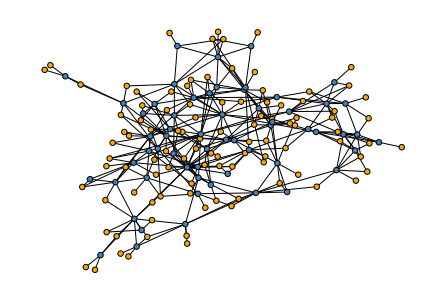

In [230]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
C = G.subgraph(Gcc[0])
layout=nx.spring_layout(C)
nx.draw(C,layout,
        node_color=['steelblue' if G.nodes[i]['type']=='doctor' else "orange" for i in C.nodes() ],
        node_size=30
        ,edgecolors='black')

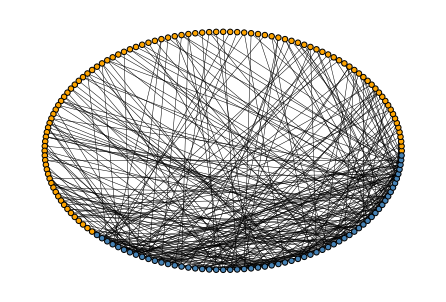

In [231]:
doctor_nodes=[i+N for i in range(M) ]
layout=nx.circular_layout(G)
nx.draw(G,layout,
        node_color=['steelblue' if G.nodes[i]['type']=='doctor' else "orange" for i in G.nodes()]
        ,node_size=30
        ,edgecolors='black',width=0.5)

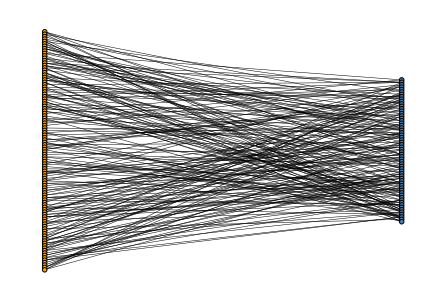

In [232]:
layout=nx.multipartite_layout(G,'type')
nx.draw(G,layout,
        node_color=['steelblue' if G.nodes[i]['type']=='doctor' else "orange" for i in G.nodes()]
        ,node_size=20
        ,edgecolors='black',width=0.5)

In [233]:
#number of overload doctor:
doctor_nodes=[i+N for i in range(M) ]
overload_doctor =0
for i in doctor_nodes:
    workload=0
    for j in G.edges([i]):
        if G[j[0]][j[1]]['type']=='p-d':
            workload = workload+G[j[0]][j[1]]['weight']
    if workload> G.nodes[i]['md_s']:
        overload_doctor=overload_doctor+1
print("The number of overloaded doctors is :" ,overload_doctor)

The number of overloaded doctors is : 38
